In [1]:
import matplotlib.pyplot as plt
from bindsnet import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Two-layer network with voltage-based LIF neurons

A simple two-layer network consisting of Bernoulli spiking input neurons densely connected to a layer of voltage-based leaky integrate-and-fire (LIF) neurons. Notice that neurons must completely regaine their "momentum" post-spike in order to obtain another spike.

In [2]:
network = Network()

time = 1000
n_input = 1
n_lif = 50

X = Input(n_input)
Y = LIFNodes(n_lif, thresh=-52 + torch.randn(n_lif))
C = Connection(X, Y)

network.add_layer(X, 'X')
network.add_layer(Y, 'Y')
network.add_connection(C, 'X', 'Y')

M = Monitor(Y, state_vars=['v', 's'])

network.add_monitor(M, 'Y_v')

NameError: name 'Network' is not defined

In [3]:
inpts = {'X' : torch.bernoulli(torch.rand(time, n_input)).byte()}
network.run(inpts, time)

In [4]:
v, s = M.get('v'), M.get('s')

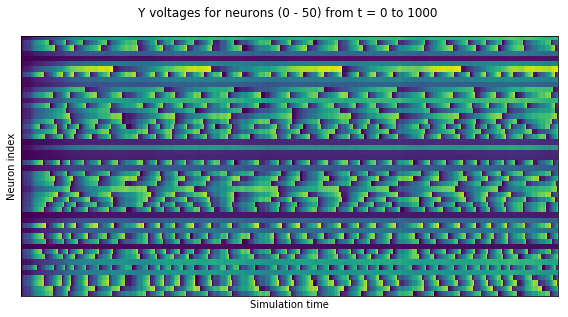

In [5]:
plot_voltages({'Y' : v});

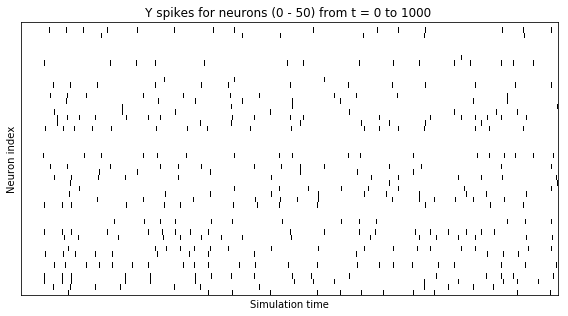

In [6]:
plot_spikes({'Y' : s});

## Two-layer network with current-based LIF neurons

The network from above is only slightly modified by replacing the voltage-based LIF neurons with current-based LIF neurons. Looking at the voltages and spikes plots, one can notice two things:

1. Neurons retain their "momentum"; i.e, the (approximate) rate of change of their voltages from before spiking are retained
2. There are a lot more spikes (as a direct result)

The first implies a possibly more biologically plausible model of neuron membrane potential, while the second implies that such a change in the model requires careful tuning of simulation parameters.

In [7]:
network = Network()

X = Input(n_input)
Y = CurrentLIFNodes(n_lif, thresh=-52 + torch.randn(n_lif))
C = Connection(X, Y)

network.add_layer(X, 'X')
network.add_layer(Y, 'Y')
network.add_connection(C, 'X', 'Y')

M = Monitor(Y, state_vars=['v', 's'])

network.add_monitor(M, 'Y_v')

In [8]:
network.run(inpts, 1000)

In [9]:
v, s = M.get('v'), M.get('s')

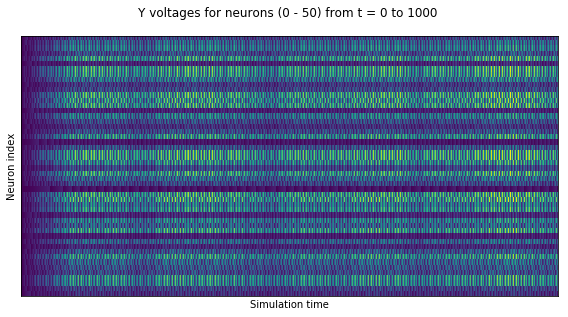

In [10]:
plot_voltages({'Y' : v});

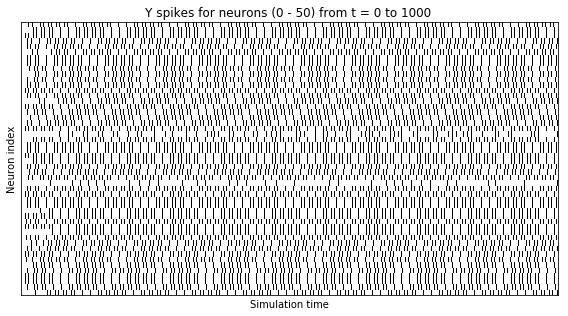

In [11]:
plot_spikes({'Y' : s});